Program jest zrobiony, ale wymaga upiększenia i skomentowania. Zrobię to w piątek 13.03 rano.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
d = {'x':[1,0],'y':[0,1]}
S = pd.DataFrame(d)
mt1 = np.array([-1,1])
mt2 = np.array([2,4])
mt3 = np.array([-2,2])
n1 = 30
n2 = 30
n3 = 30
n = n1+n2+n3
X1 = np.random.multivariate_normal(mt1, S, n1)
X2 = np.random.multivariate_normal(mt2, S, n2)
X3 = np.random.multivariate_normal(mt3, S, n3)
g = 3

In [4]:
m = np.mean(np.array([mt1,mt2,mt3]),0)
B = (np.dot(n1*(mt1 - m), np.transpose(mt1 - m)) + np.dot(n2*(mt2 - m), np.transpose(mt2 - m)) + np.dot(n3*(mt3 - m), np.transpose(mt3 - m)))/(g-1)
W = ((n1 - 1) * S + (n2 - 1) * S + (n3 - 1) * S)/(n-g)
U = np.dot(np.linalg.inv(W),B)
l = np.linalg.eig(U)
a = l[1][np.argmax(l[0])]

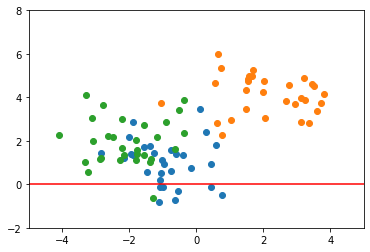

In [5]:
x = np.array([-100, 100])
y = (a[1]/a[0])*x
plt.plot(X1[:,0], X1[:,1], 'o')
plt.plot(X2[:,0], X2[:,1], 'o')
plt.plot(X3[:,0], X3[:,1], 'o')
plt.xlim(-5,5)
plt.ylim(-2,8)
plt.plot(x, y, '-r')
plt.show()

In [6]:
# def rzutowanie(X, A):
#     Xz = (X[:,1] * A + X[:,0]) / (np.square(A) + 1)
#     Yz = A * Xz
#     d = {'x': Xz, 'y': Yz}
#     return pd.DataFrame(data=d)

In [7]:
def rzutowanie(X, A):
    Xz = (X[:,1] * A + X[:,0]) / (np.square(A) + 1)
    Yz = A * Xz
    xy = np.array([Xz,Yz])
    return xy

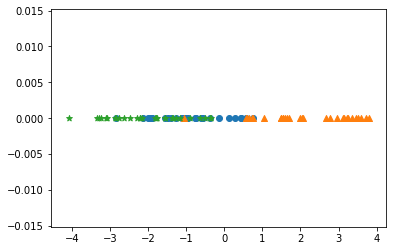

In [8]:
A = a[1]/a[0]
r1 = rzutowanie(X1, A)
r2 = rzutowanie(X2, A)
r3 = rzutowanie(X3, A)
plt.scatter(r1[0,:],r1[1,:],marker = 'o')
plt.scatter(r2[0,:],r2[1,:],marker = '^')
plt.scatter(r3[0,:],r3[1,:],marker = '*')
plt.show()

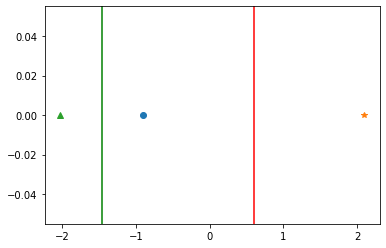

In [9]:
m1 = np.mean(r1[0,:])
m2 = np.mean(r2[0,:])
m3 = np.mean(r3[0,:])
m12 = (m1 + m2)/2
m13 = (m1 + m3)/2
plt.plot(m1,0,'o')
plt.plot(m2,0,'*')
plt.plot(m3,0,'^')
plt.axvline(x = m12, color = 'r')
plt.axvline(x = m13, color = 'g')

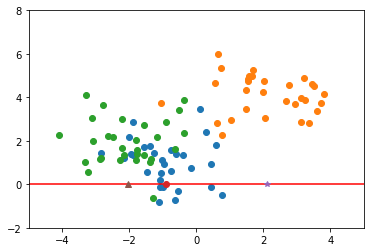

In [10]:
plt.plot(X1[:,0], X1[:,1], 'o')
plt.plot(X2[:,0], X2[:,1], 'o')
plt.plot(X3[:,0], X3[:,1], 'o')
plt.xlim(-5,5)
plt.ylim(-2,8)
x = np.array([-100, 100])
y = (a[1]/a[0])*x
plt.plot(x, y, '-r')
plt.plot(m1,0,'o')
plt.plot(m2,0,'*')
plt.plot(m3,0,'^')
#plt.axvline(x = m12, color = 'r')
#plt.axvline(x = m13, color = 'g')
plt.show()